In [ ]:
import torch
import os
import time
import pandas as pd
from tqdm.auto import tqdm
import argparse

import sys

sys.path.append("../.")
from utils.load_util import load_sdxl_models, load_pipe


distillation_type = "dmd"  # what type of distillation model do you want to use ("dmd", "lcm", "turbo", "lightning")
device = "cuda:0"
weights_dtype = torch.bfloat16

pipe, base_unet, base_scheduler, distilled_unet, distilled_scheduler = load_sdxl_models(
    distillation_type=distillation_type, weights_dtype=weights_dtype, device=device
)

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

c:\Users\GinMa\.conda\envs\CS7150\lib\site-packages\diffusers\configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


dmd2_sdxl_4step_unet_fp16.bin:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

In [ ]:
base_guidance_scale = 0
distilled_guidance_scale = 0

run_base_till_timestep = None  # set to none if you want it to be automatically decided
run_distilled_from_timestep = 1


# how many total timesteps to set for schedulers
base_num_inference_steps = 4
distilled_num_inference_steps = 4

# for paper consistent results use this
base_scheduler = distilled_scheduler

# set the timesteps for the model
base_scheduler.set_timesteps(base_num_inference_steps)
distilled_scheduler.set_timesteps(distilled_num_inference_steps)

# automatically figure out what is the natural point to turn off the base model
if run_base_till_timestep is None:
    # check the timestep from which you need to run the model
    distilled_timestep = distilled_scheduler.timesteps[run_distilled_from_timestep]

    # check the closest timestep in basemodel
    base_timesteps = abs(base_scheduler.timesteps - distilled_timestep)
    run_base_till_timestep = base_timesteps.argmin()

  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\GinMa\AppData\Roaming\Python\Python310\site-packages\transformers\models\clip\modeling_clip.py:546: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


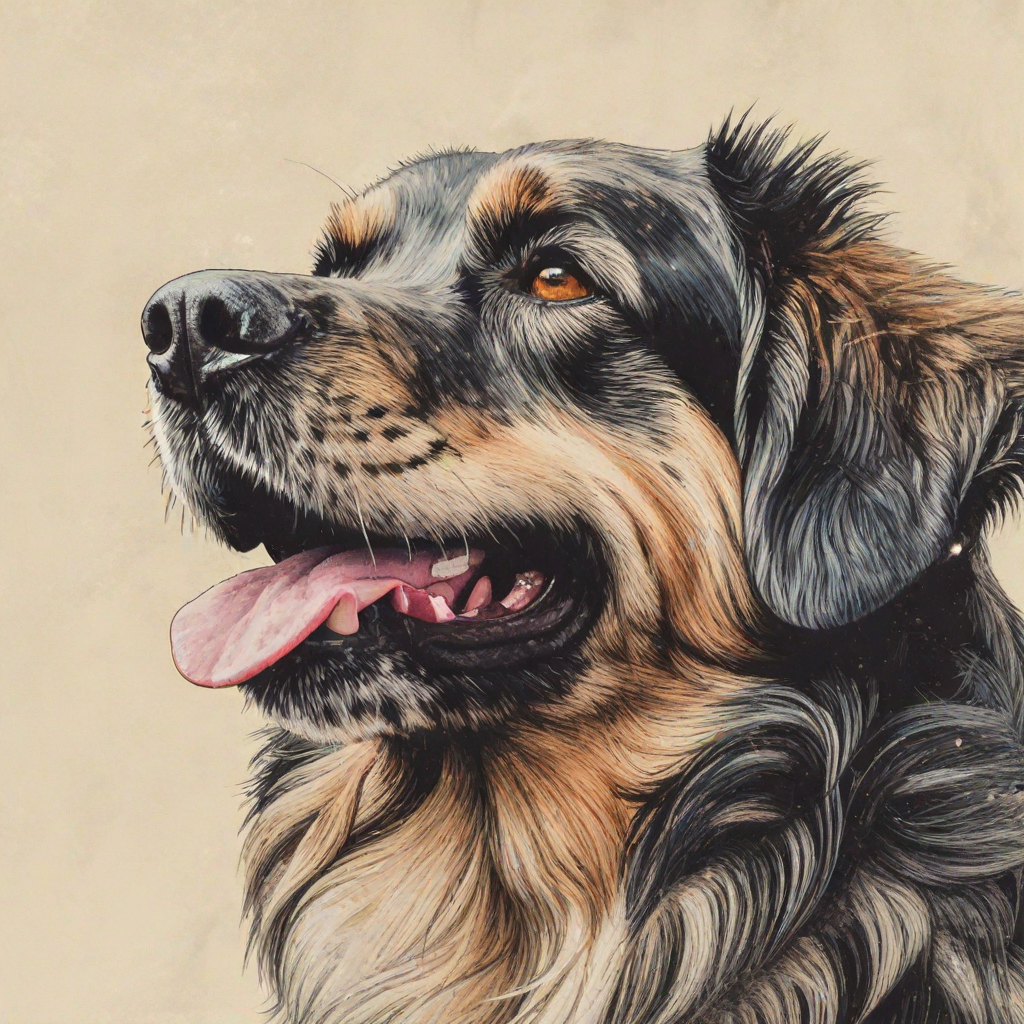

In [4]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 1
prompt = "image of a dog"


# Initialize variables
total_time = 0
all_images = []

pipe.set_progress_bar_config(disable=True)
# Generate images
for i in tqdm(range(num_images)):
    # Generate random seed
    rng = np.random.default_rng()
    seed = rng.integers(0, 2**32, dtype=np.uint32)
    generator = torch.manual_seed(int(seed))

    # First use base model
    pipe.unet = base_unet
    pipe.scheduler = base_scheduler

    start_time = time.perf_counter()
    base_latents = pipe(
        prompt=prompt,
        from_timestep=0,
        till_timestep=run_base_till_timestep,
        guidance_scale=base_guidance_scale,
        num_inference_steps=base_num_inference_steps,
        output_type="latent",
    )

    # Switch to distilled model
    pipe.unet = distilled_unet
    pipe.scheduler = distilled_scheduler

    pil_image = pipe(
        prompt=prompt,
        start_latents=base_latents,
        guidance_scale=distilled_guidance_scale,
        from_timestep=run_distilled_from_timestep,
        till_timestep=None,
        num_inference_steps=distilled_num_inference_steps,
    )[0]
    end_time = time.perf_counter()

    runtime = end_time - start_time
    total_time += runtime

    display(pil_image)

# Individual Pipe Inference

In [ ]:
import torch
import os
import time
import pandas as pd
from tqdm.auto import tqdm
import argparse

import sys

sys.path.append(".")
from utils.load_util import load_sdxl_models, load_pipe


distillation_type = None  # set to None for base model
device = "cuda:0"
weights_dtype = torch.bfloat16

pipe = load_pipe(
    distillation_type=distillation_type, weights_dtype=weights_dtype, device=device
)

In [ ]:
guidance_scale = 8
num_inference_steps = 50

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 1  # 5x5 grid
prompt = "image of a wizard"

# Initialize variables
total_time = 0
all_images = []

pipe.set_progress_bar_config(disable=True)

# Generate images
for i in tqdm(range(num_images)):
    # Generate random seed
    seed = np.random.randint(0, 2**32 - 1)
    generator = torch.manual_seed(seed)

    # First use base model
    start_time = time.perf_counter()
    pil_image = pipe(
        prompt=prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
    )[0]
    end_time = time.perf_counter()

    runtime = end_time - start_time
    total_time += runtime

    # Convert PIL image to numpy array and append to list
    display(pil_image)